In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [60]:
job="app_developer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [61]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Webcraft It,Android Developer – Backend Libraries Specialist,Remote,950000.0,"Gradle, Android, Java, SDKs, Agile",4.4,App Developer
1,IT Solutions Management International Pte. Ltd.,Flutter Developer,Remote,1200000.0,"English, UX, Integration testing, GraphQL",NaN,App Developer
2,Arista Consulting,Application Developer (Fresher),Hyderābād,650000.0,"Software troubleshooting, iOS, .NET, Java, PHP",5.0,App Developer
3,TalentXo,"IOS Developer (Swift, Cocoa)",Remote,3650000.0,"CI/CD, iOS development, Software deployment, i...",NaN,App Developer
4,Teqlawn,Freelance Android Developer,Remote,600000.0,"Software troubleshooting, Java, APIs, Android ...",NaN,App Developer


In [62]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    11
company_rating           337
standardized_job_role      0
dtype: int64

In [63]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [64]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
6,Accenture,Application Developer,Hyderābād,0.0,"Database management, Telecommunication, Softwa...",3.8,App Developer
17,Saffo Solution Technology,Android Developer -Remote,Remote,0.0,"Git, OOP, SVN, REST, APIs",4.2,App Developer
22,VISANKA TECHNOLOGIES PRIVATE LIMITED,Flutter Developer,Remote,0.0,"MVC, Node.js, Git, PHP, Analysis skills",NaN,App Developer
25,Limish,Android Developer (1-3 yrs),Remote,0.0,"Android, Java, SDKs",NaN,App Developer
27,Oracle,Application Developer - React JS,India,0.0,"CI/CD, Oracle, Node.js, Software troubleshooti...",3.8,App Developer
...,...,...,...,...,...,...,...
851,ZS,Software Engineer - iOS,Pune,0.0,"Performance tuning, MVC, iOS development, Mobi...",3.6,App Developer
852,Hackveda,iOS Penetration Tester,Delhi,0.0,"iOS development, iOS, Communication skills",3.7,App Developer
855,Helius Technologies,Android Engineer (Java/kotlin),India,0.0,"Data structures, Git, English, Android, Java",4.2,App Developer
858,Google,"Software Engineer, Mobile (Android), Search",Bengaluru,0.0,"Data structures, Data analysis skills, System ...",4.3,App Developer


### Filling the null values by replacing with average salary of company rating

In [66]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [67]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [68]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Webcraft It,Android Developer – Backend Libraries Specialist,Remote,9.500000,"Gradle, Android, Java, SDKs, Agile",4.4,App Developer
1,IT Solutions Management International Pte. Ltd.,Flutter Developer,Remote,12.000000,"English, UX, Integration testing, GraphQL",0.0,App Developer
2,Arista Consulting,Application Developer (Fresher),Hyderābād,6.500000,"Software troubleshooting, iOS, .NET, Java, PHP",5.0,App Developer
3,TalentXo,"IOS Developer (Swift, Cocoa)",Remote,36.500000,"CI/CD, iOS development, Software deployment, i...",0.0,App Developer
4,Teqlawn,Freelance Android Developer,Remote,6.000000,"Software troubleshooting, Java, APIs, Android ...",0.0,App Developer
...,...,...,...,...,...,...,...
858,Google,"Software Engineer, Mobile (Android), Search",Bengaluru,23.438333,"Data structures, Data analysis skills, System ...",4.3,App Developer
859,Accenture,Application Developer,Bengaluru,20.186667,"CI/CD, Software troubleshooting, Kubernetes, A...",3.8,App Developer
860,MoEngage Inc,Senior Software Engineer - iOS,Bengaluru,5.500000,"React, iOS development, Mobile applications, i...",4.1,App Developer
861,Mind Spark Technologies,UI/UX Designer - Web & Mobile Applications,Coimbatore,7.000000,"Adobe Photoshop, CSS, JavaScript, Adobe XD, UX",3.4,App Developer


In [69]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [70]:
df.describe()

,salary_lpa,company_rating
count,863.000000,863.000000
mean,9.725192,2.394206
std,10.141859,2.017249
min,0.300000,0.000000
25%,4.800000,0.000000
50%,5.500000,3.400000
75%,10.162424,4.200000
max,48.000000,5.000000


In [71]:
df.nunique()

company_name             760
job_role                 371
job_location              84
salary_lpa               135
skills                   759
company_rating            35
standardized_job_role      1
dtype: int64

### Exporting the cleaned Dataframe to anylze it further

In [73]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [75]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [76]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                       Skill  Count
10                       ios    428
28       mobile applications    422
14           ios development    230
16                       git    229
26   application development    182
..                       ...    ...
80                 live chat      1
143                      pos      1
38             elasticsearch      1
138             2d animation      1
212                  ansible      1

[213 rows x 2 columns]


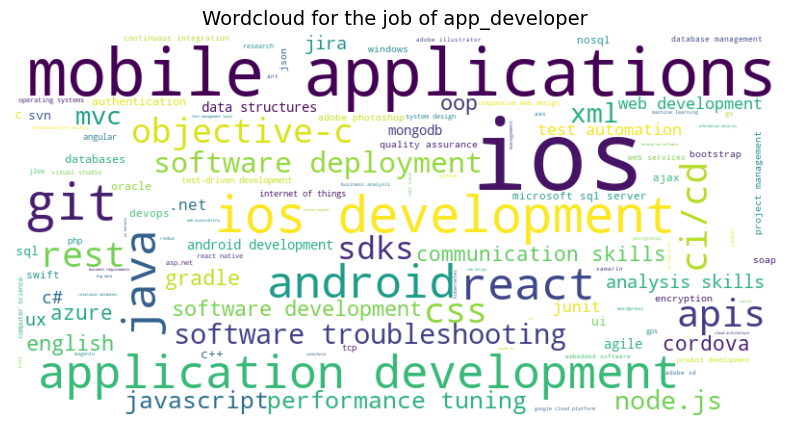

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


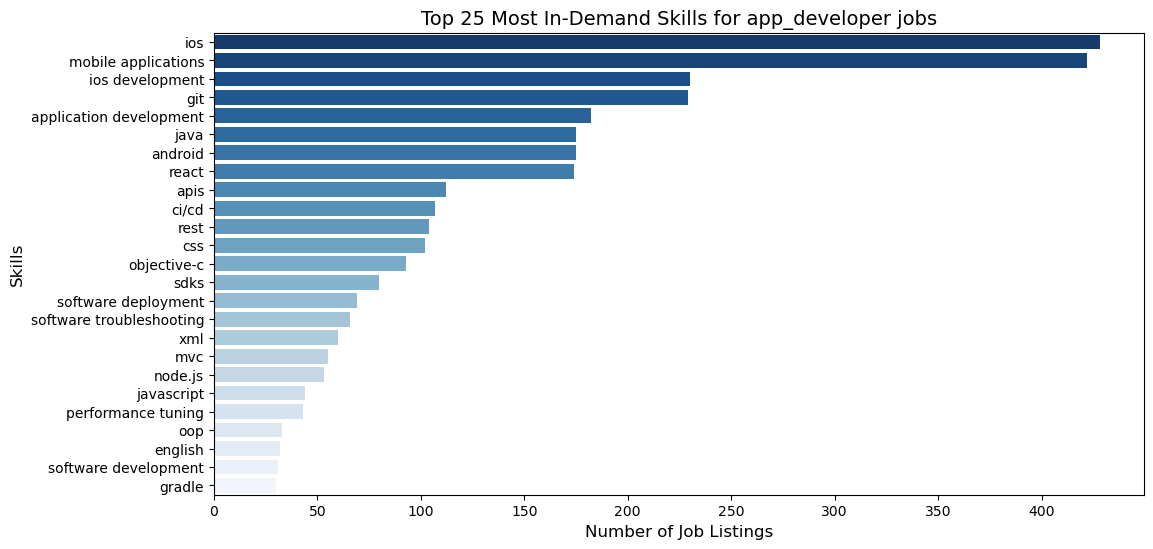

In [78]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [80]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                  company_name  salary_lpa
745            lepton software        48.0
663          Virasat Solutions        48.0
93           Babysoft Software        48.0
635            TotHR Solutions        48.0
114                   Bobcares        48.0
452       ORGware Technologies        48.0
343                     Jploft        48.0
291        Heliconia Solutions        48.0
488  Primacy Infotech Pvt. Ltd        48.0
318                    Infoane        48.0


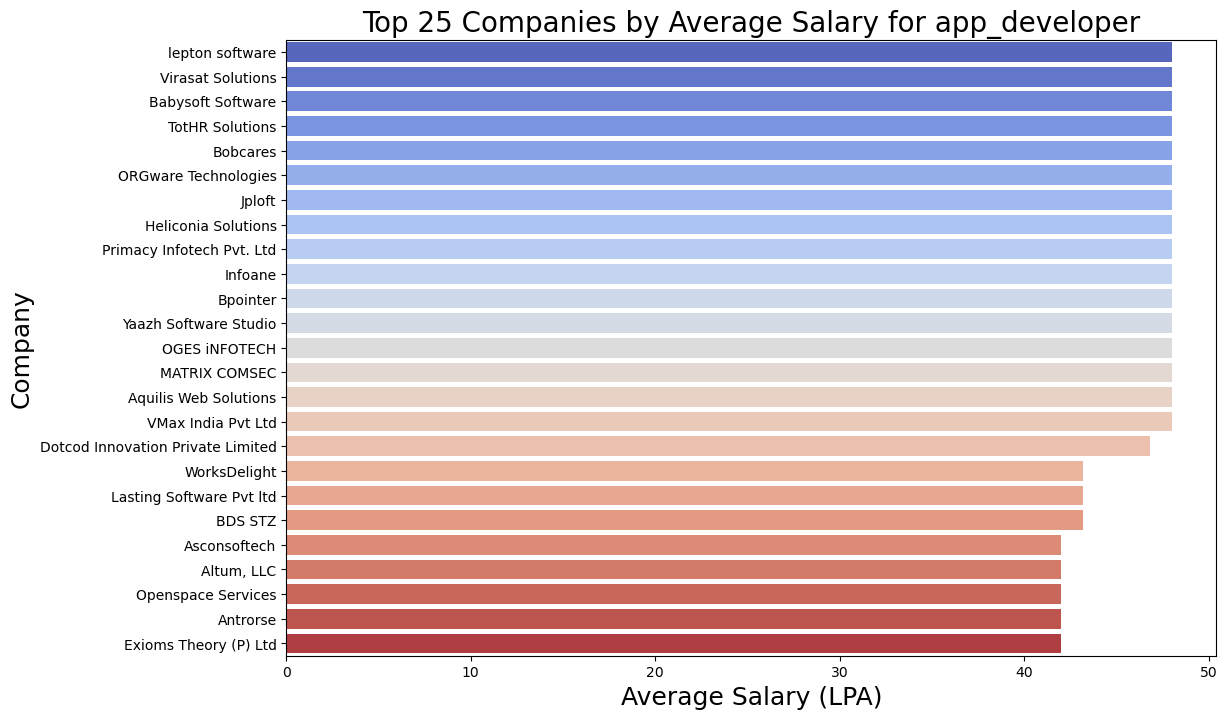

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

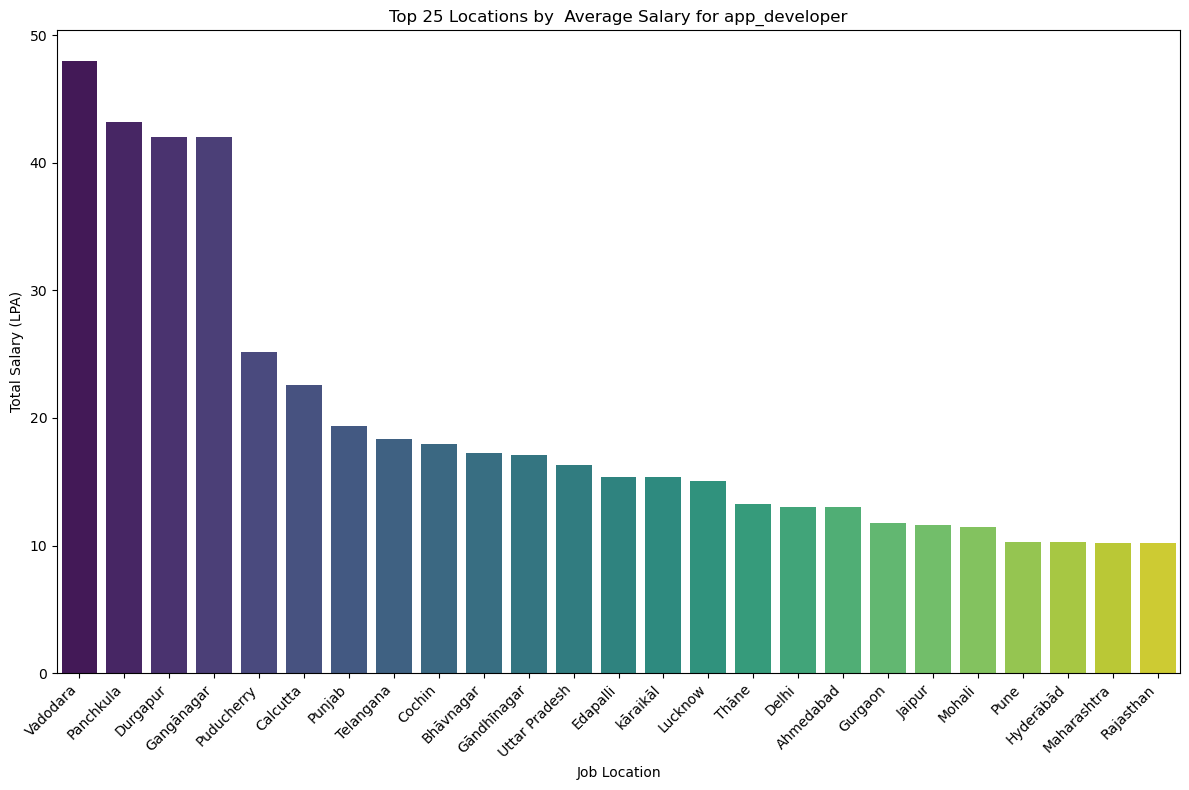

In [83]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

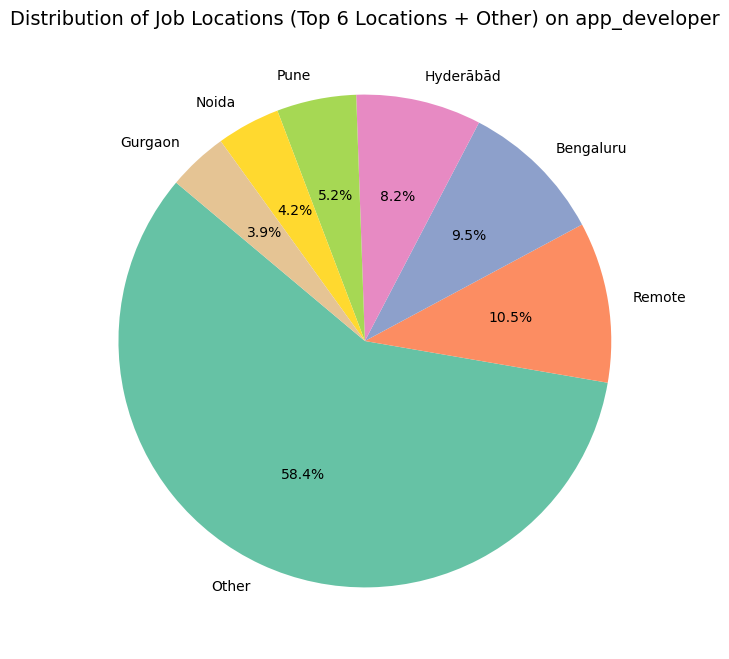

In [84]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

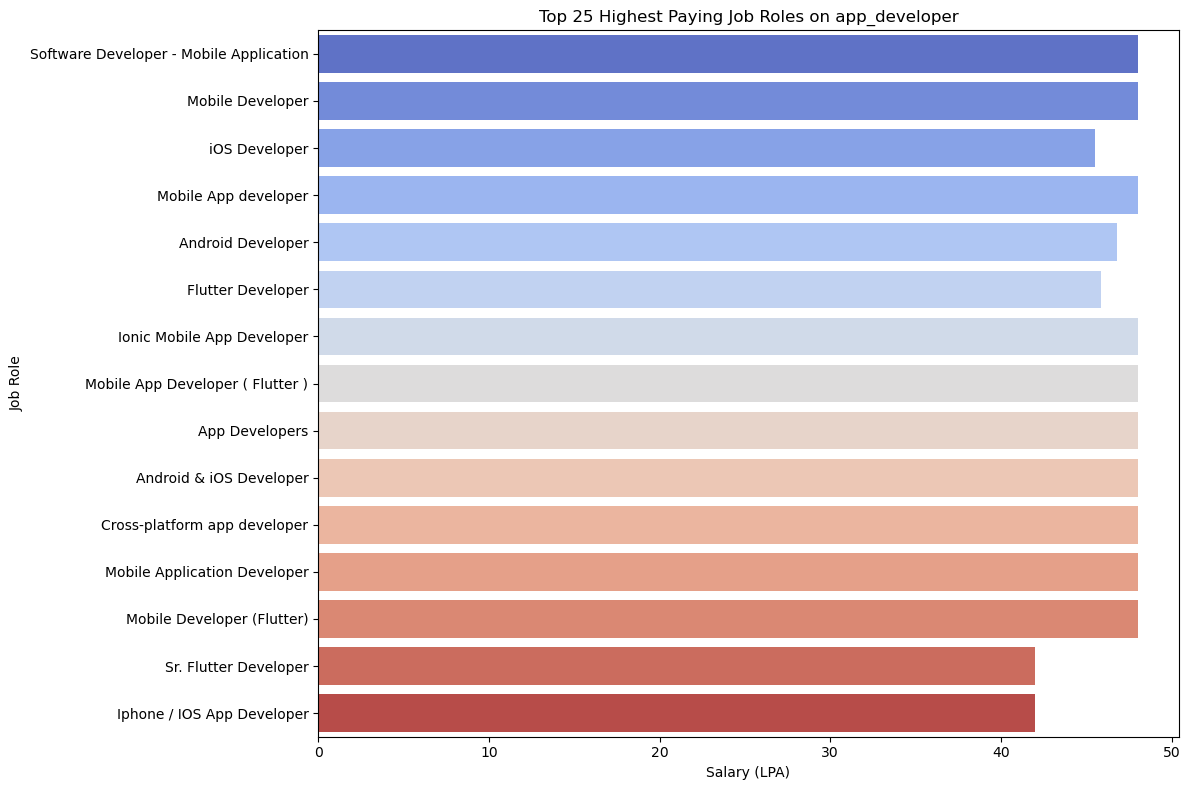

In [86]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [88]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_14280\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


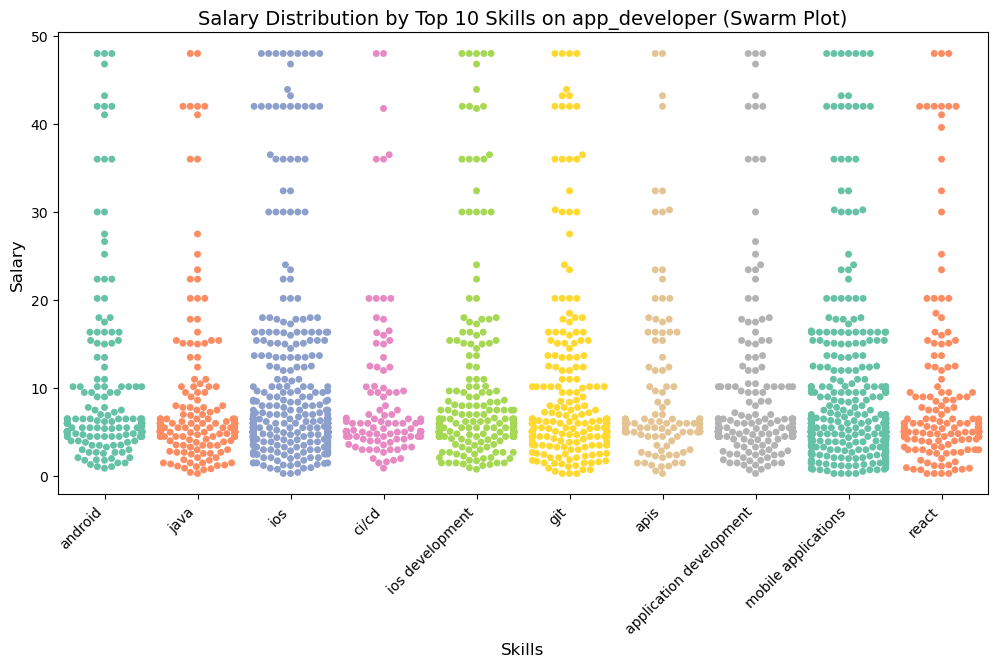

In [89]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

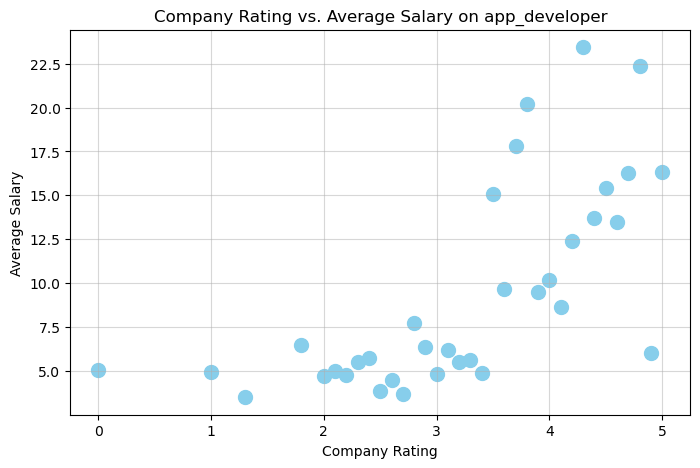

In [91]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [92]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.2880951266552234